# **HW1: Regression**
In *assignment 1*, you need to finish:

1.  Basic Part: Implement two regression models to predict the Systolic blood pressure (SBP) of a patient. You will need to implement **both Matrix Inversion and Gradient Descent**.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implement one regression model to predict the SBP of multiple patients in a different way than the basic part. You can choose **either** of the two methods for this part.

# **1. Basic Part (55%)**
In the first part, you need to implement the regression to predict SBP from the given DBP


## 1.1 Matrix Inversion Method (25%)


*   Save the prediction result in a csv file **hw1_basic_mi.csv**
*   Print your coefficient


### *Import Packages*

> Note: You **cannot** import any other package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### *Global attributes*
Define the global attributes

In [2]:
training_dataroot = 'hw1_basic_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_basic_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_basic_mi.csv'         # Output file will be named as 'hw1_basic.csv'

You can add your own global attributes here


In [3]:
def MAPE(y_hat: np.ndarray, y: np.ndarray) -> float:
    return np.mean(np.abs((y_hat - y) / y)) * 100

### *Load the Input File*
First, load the basic input file **hw1_basic_training.csv** and **hw1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [4]:
# Read input csv to datalist
training_datalist = pd.read_csv(training_dataroot) # Training datalist, saved as numpy array
testing_datalist = pd.read_csv(testing_dataroot)   # Testing datalist, saved as numpy array

### *Implement the Regression Model*

> Note: It is recommended to use the functions we defined, you can also define your own functions


#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset
* Validation dataset is used to validate your own model without the testing data



In [5]:
def SplitData(df: pd.DataFrame) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    n = len(df) // 16
    y = df["sbp"]
    X = df.assign(sbp=1)
    return X[:-n], X[-n:], y[:-n], y[-n:]

#### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [6]:
def PreprocessData(df: pd.DataFrame) -> pd.DataFrame:
    return df.pipe(lambda x: x[(x - x.mean()).abs() / x.std() <= 3]).dropna()

#### Step 3: Implement Regression
> use Matrix Inversion to finish this part




In [7]:
def MatrixInversion(X_train: np.ndarray, X_valid: np.ndarray, y_train: np.ndarray, y_valid: np.ndarray) -> np.ndarray:
    w = np.linalg.pinv(X_train) @ y_train
    # w, *_ = np.linalg.lstsq(X_train, y_train, None)
    y_valid_hat = X_valid @ w
    print(f"Validation loss: {MAPE(y_valid_hat, y_valid)}")
    return w

#### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

In [8]:
def MakePrediction(X_test: np.ndarray, w: np.ndarray) -> np.ndarray:
    return X_test @ w

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```





Validation loss: 5.044288463171989


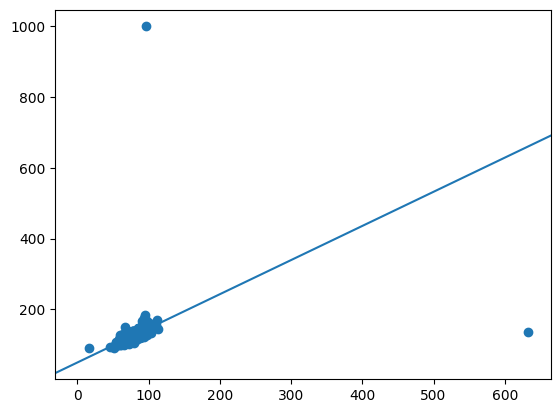

In [9]:
w = MatrixInversion(*SplitData(PreprocessData(training_datalist).sample(frac=1)))
plt.scatter(training_datalist["dbp"], training_datalist["sbp"])
plt.axline((0, w[-1]), slope=w[-2])
output_datalist = MakePrediction(testing_datalist.assign(sbp=1), w)

In [10]:
print(' '.join(str(i) for i in w))

0.965398863422468 49.822258977881184


### *Write the Output File*
Write the prediction to output csv
> Format: 'sbp'




In [11]:
np.savetxt(output_dataroot, output_datalist)

## 1.2 Gradient Descent Method (30%)


*   Save the prediction result in a csv file **hw1_basic_gd.csv**
*   Output your coefficient update in a csv file **hw1_basic_coefficient.csv**
*   Print your coefficient





### *Global attributes*

In [12]:
output_dataroot = 'hw1_basic_gd.csv' # Output file will be named as 'hw1_basic.csv'
coefficient_output_dataroot = 'hw1_basic_coefficient.csv'

coefficient_output_datalist = [] # Your coefficient update during gradient descent
                                 # Should be a (number of iterations * number_of coefficient) matrix
                                 # The format of each row should be ['w0', 'w1', ...., 'wn']

Your own global attributes

### *Implement the Regression Model*


#### Step 1: Split Data

In [13]:
# def SplitData():

#### Step 2: Preprocess Data

In [14]:
# def PreprocessData():

#### Step 3: Implement Regression
> use Gradient Descent to finish this part

In [15]:
def GradientDescent(X_train: np.ndarray, X_valid: np.ndarray, y_train: np.ndarray, y_valid: np.ndarray, epochs=8128) -> np.ndarray:
    w = np.array([1., 50.])
    n = len(X_train)
    alpha = 1e-4 # learning rate
    history = []
    for i in range(epochs):
        gradient = -2 / n * ((y_train - (X_train @ w)) @ X_train)
        w -= alpha / (1 + i) * gradient
        coefficient_output_datalist.append(w_copy := np.copy(w))
        valid_loss = MAPE(X_valid @ w, y_valid)
        if not history or history[-1]["valid_loss"] >= valid_loss:
            history.append({"valid_loss": valid_loss, 'w': w_copy})
        print(f"Epoch {i}: validation loss = {valid_loss}")
        if i - len(history) > 5:
            break
    if not history or history[-1]["valid_loss"] > 10:
        raise Exception(f"Not converge in {epochs} epochs")
    return history[-1]['w']

#### Step 4: Make Prediction

Make prediction of testing dataset and store the values in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

Remember to also store your coefficient update in *coefficient_output*
The final *coefficient_output* should look something like this
> [ [1, 0, 3, 5], ... , [0.1, 0.3, 0.2, 0.5] ] where each row contains the [w0, w1, ..., wn] of your coefficient





In [16]:
# def MakePrediction():

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```



Epoch 0: validation loss = 5.750612660800387
Epoch 1: validation loss = 5.73229973443037
Epoch 2: validation loss = 5.745771069545821
Epoch 3: validation loss = 5.751229080234453
Epoch 4: validation loss = 5.754089767015107
Epoch 5: validation loss = 5.755816016742283
Epoch 6: validation loss = 5.756955498369312
Epoch 7: validation loss = 5.757756075145788
Epoch 8: validation loss = 5.758345000874022


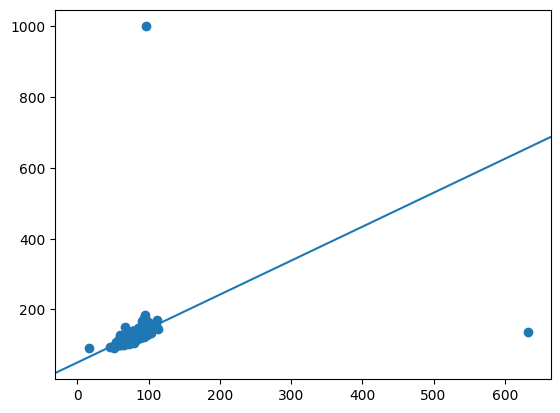

In [17]:
w = GradientDescent(*SplitData(PreprocessData(training_datalist).sample(frac=1)))
plt.scatter(training_datalist["dbp"], training_datalist["sbp"])
plt.axline((0, w[-1]), slope=w[-2])
output_datalist = MakePrediction(testing_datalist.assign(sbp=1), w)

In [18]:
print(' '.join(str(i) for i in w))

0.9595639956386246 49.9995111072171


### *Write the Output File*

Write the prediction to output csv
> Format: 'sbp'

**Write the coefficient update to csv**
> Format: 'w0', 'w1', ..., 'wn'
>*   The number of columns is based on your number of coefficient
>*   The number of row is based on your number of iterations

In [19]:
np.savetxt(output_dataroot, output_datalist)
np.savetxt(coefficient_output_dataroot, coefficient_output_datalist, delimiter=',')

# **2. Advanced Part (40%)**
In the second part, you need to implement the regression in a different way than the basic part to help your predictions of multiple patients SBP.

You can choose **either** Matrix Inversion or Gradient Descent method.

The training data will be in **hw1_advanced_training.csv** and the testing data will be in **hw1_advanced_testing.csv**.

Output your prediction in **hw1_advanced.csv**

Notice:
> You cannot import any other package other than those given



### Input the training and testing dataset

In [20]:
training_dataroot = 'hw1_advanced_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_advanced_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_advanced.csv'            # Output file will be named as 'hw1_basic.csv'

training_datalist = pd.read_csv(training_dataroot) # Training datalist, saved as numpy array
testing_datalist = pd.read_csv(testing_dataroot)   # Testing datalist, saved as numpy array

output_datalist = testing_datalist["sbp"].copy().astype("float") # Your prediction, should be 220 * 1 matrix and saved as numpy array
                                                                 # The format of each row should be ['sbp']

### Your Implementation

In [21]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    return (
        df.drop(columns=["subject_id", "charttime"])
          .ffill().bfill()
          .pipe(lambda x: x[(x - x.mean()).abs() / x.std() <= 3]).dropna()
    )


def split(df: pd.DataFrame) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    n = len(df) // 16
    y = df["sbp"]
    X = df.assign(sbp=1)
    return X[:-n], X[-n:], y[:-n], y[-n:]


w = {}
for id, g in training_datalist.groupby("subject_id"):
    X_train, X_valid, y_train, y_valid = g.pipe(preprocess).sample(frac=1).pipe(split)
    w[id], *_ = np.linalg.lstsq(X_train, y_train, None)
    print(f"Validation loss: {MAPE(X_valid @ w[id], y_valid)}")

for id, g in testing_datalist.groupby("subject_id"):
    output_datalist[g.index] = g.drop(columns=["subject_id", "charttime"]).assign(sbp=1) @ w[id]

Validation loss: 11.737738239027708
Validation loss: 10.356073252475431
Validation loss: 13.810347819738844
Validation loss: 12.791560987828401
Validation loss: 7.59738586022376
Validation loss: 10.277407073151343
Validation loss: 7.149360664922708
Validation loss: 13.04656852756098
Validation loss: 12.644817208350915
Validation loss: 8.794482985711722
Validation loss: 10.268538813994887


### Output your Prediction

> your filename should be **hw1_advanced.csv**

In [22]:
np.savetxt(output_dataroot, output_datalist)

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered
*   Summarize your work and your reflections
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)